<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [15]:
!pip install yfinance==0.1.63
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly


  Preparing metadata (setup.py) ... done
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23913 sha256=59f12a32f1d010b6972cffadc8a0fa1119f130fa7d54541e976d97d8bb4352a4
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/14/5e/8b/1c95139f27f44010bba7c779d572949b1b4bf4b1ef79cb725a
Successfully built yfinance
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.12
    Uninstalling yfinance-0.2.12:
      Successfully uninstalled yfinance-0.2.12


In [107]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Define Graphing Function

In [118]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `TSLA`.


In [17]:
tesla = yf.Ticker("TSLA")

get the historical market data

In [19]:
tesla_history = tesla.history(period="max")

display the data

In [20]:
tesla_history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points


Use the requests library to get the HTML content of a webpage.

In [129]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text


Use the BeautifulSoup library to parse the HTML data.

In [130]:
soup = BeautifulSoup(html_data, "html5lib")


Find the table containing Tesla's quarterly revenue data using the read_html function from pandas.

In [133]:
tesla_revenue = pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]


Rename the columns of the table.

In [134]:
tesla_revenue = tesla_revenue.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'})


Remove the "$" and "," characters from the "Revenue" column.

In [135]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",","").str.replace("$","", regex=False)


Drop any rows with missing values.

In [136]:
tesla_revenue.dropna(inplace=True)


In [137]:
print(tesla_revenue.head())
print(tesla_revenue.tail())


         Date Revenue
0  2022-12-31   24318
1  2022-09-30   21454
2  2022-06-30   16934
3  2022-03-31   18756
4  2021-12-31   17719
          Date Revenue
49  2010-09-30      31
50  2010-06-30      28
51  2010-03-31      21
53  2009-09-30      46
54  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data - 1 Points


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `GME`.


In [99]:
gamestop = yf.Ticker("GME")

In [100]:
gme_data=gamestop.history(period="max")

In [101]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


In [114]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

Use pandas' read_html() function to scrape the revenue data from the website<br>
Rename the columns of the resulting dataframe for better clarity<br>
Remove commas and dollar signs from the Revenue column<Br>
Drop any rows with missing data<br>
Display the last 5 rows of the dataframe using the tail() function<br>

In [115]:
gme_revenue = pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue = gme_revenue.rename(columns={'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'})
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "",regex=False)
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
51,2010-01-31,3524
52,2009-10-31,1835
53,2009-07-31,1739
54,2009-04-30,1981
55,2009-01-31,3492


## Question 5: Plot Tesla Stock Graph


In [ ]:
make_graph(tesla_history, tesla_revenue, 'Tesla Stock Data Graph')

## Question 6: Plot GameStop Stock Graph


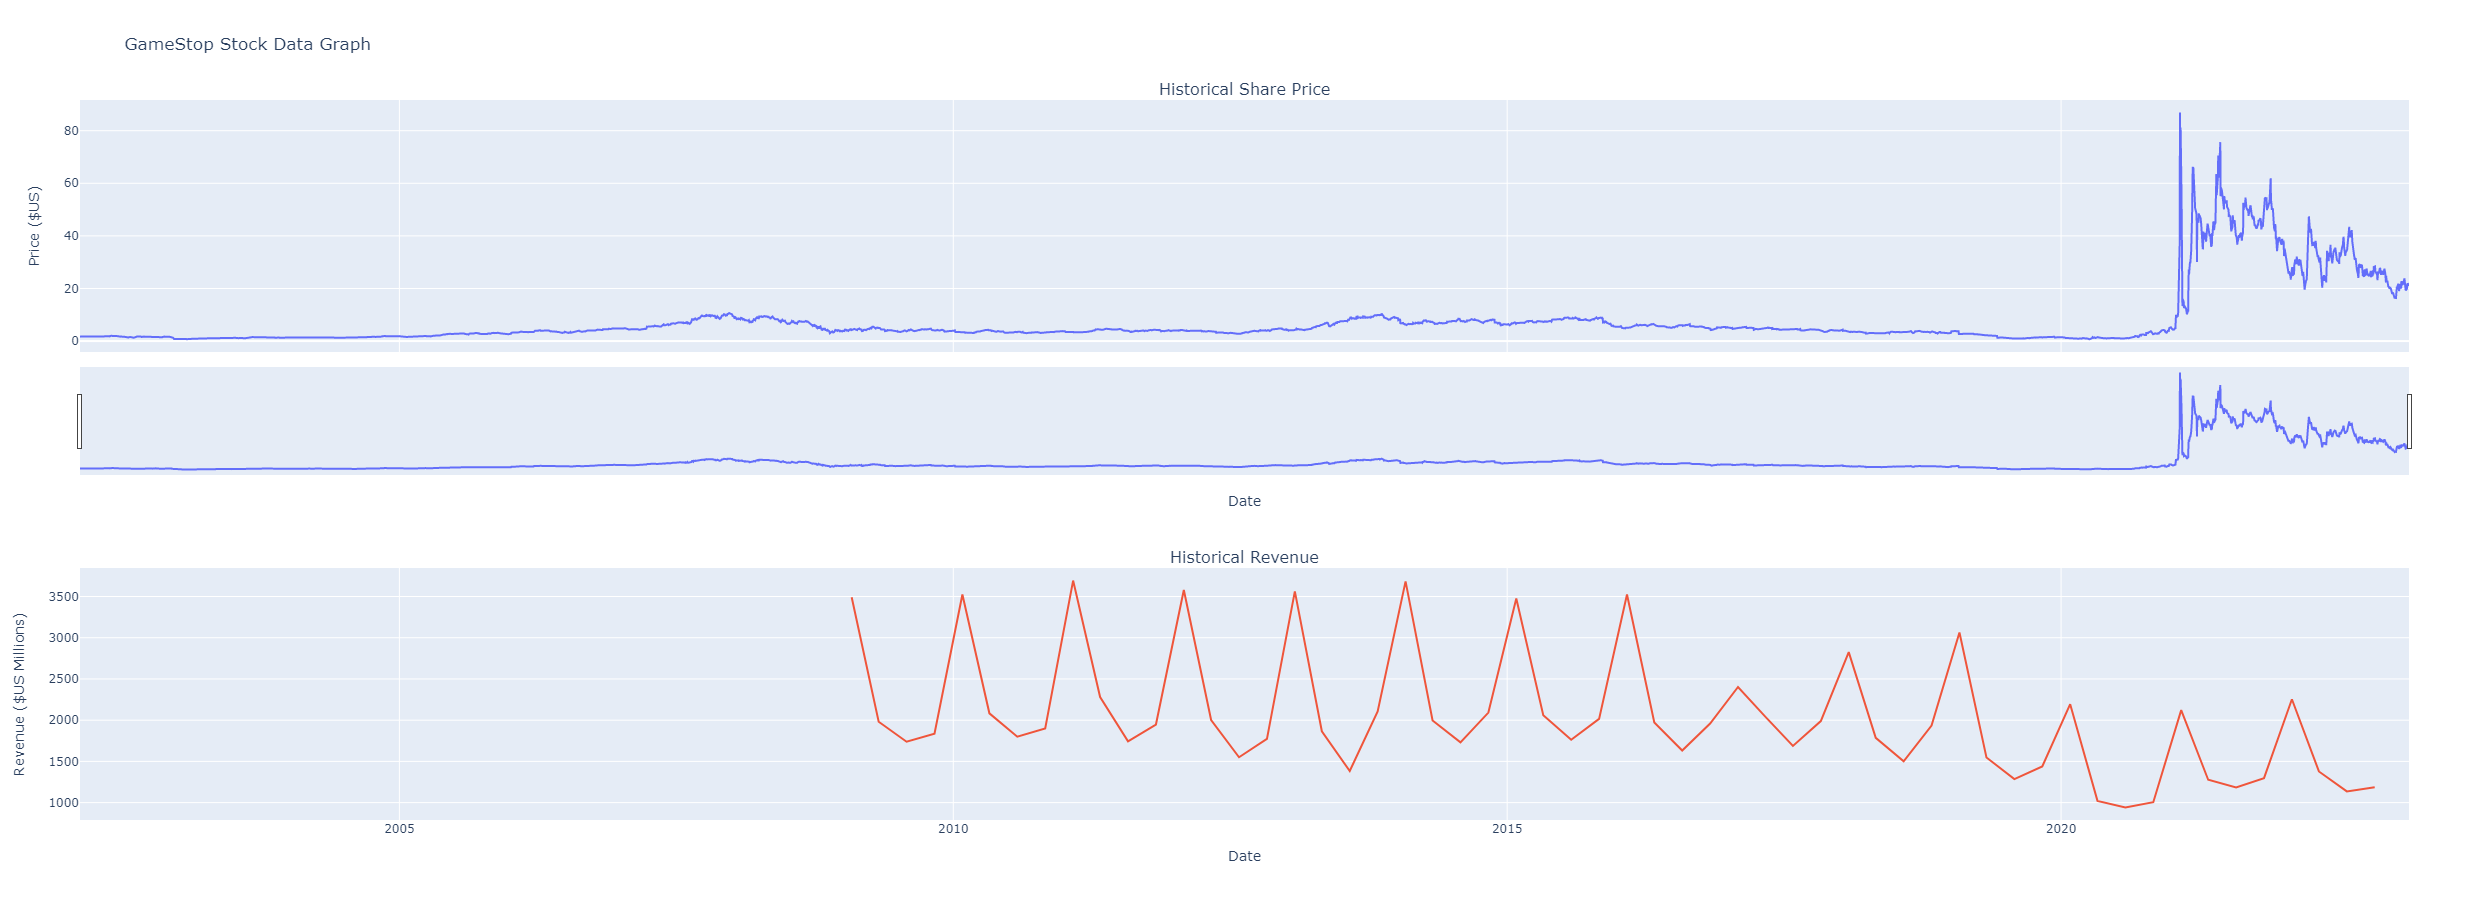

In [124]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')

A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [7]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099722,0.100155,0.099722,0.099722,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094953,0.094953,0.094519,0.094519,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088015,0.088015,0.087582,0.087582,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089749,0.090183,0.089749,0.089749,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092351,0.092785,0.092351,0.092351,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [9]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

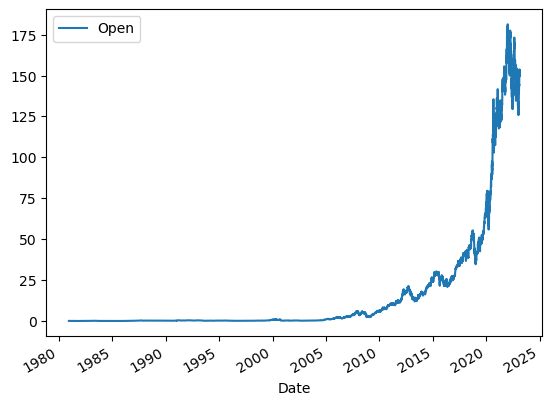

In [10]:
apple_share_price_data.plot(x="Date", y="Open")